In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a= '/content/loan_sanction_test.csv'
df = pd.read_csv(a)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df['Loan_ID'].drop_duplicates()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df.isnull().sum()/df.count()

,0
Loan_ID,0.000000
Gender,0.030899
Married,0.000000
Dependents,0.028011
Education,0.000000
Self_Employed,0.066860
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.013812
Loan_Amount_Term,0.016620


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830
std,4790.683934,2377.599209,59.699582,65.655503,0.366469
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

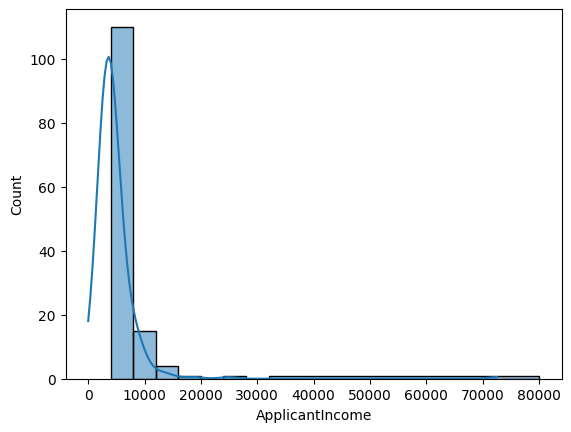

In [ ]:
sns.histplot(data=df,x="ApplicantIncome",kde=True,bins=[4000,8000,12000,16000,20000,24000,28000,32000,80000])

<Axes: ylabel='CoapplicantIncome'>

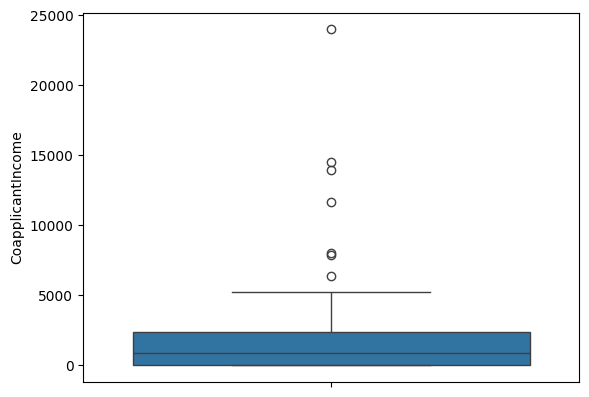

In [ ]:
sns.boxplot(data= df,y='CoapplicantIncome')

<Axes: xlabel='LoanAmount', ylabel='Count'>

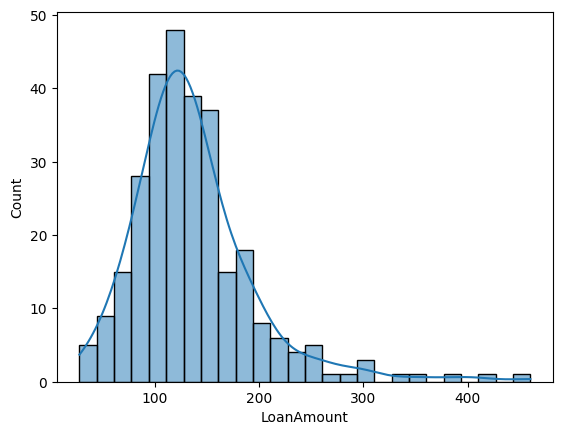

In [ ]:
sns.histplot(data=df,x="LoanAmount",kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

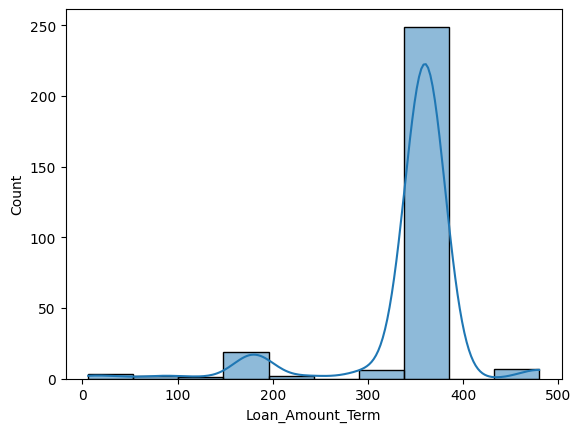

In [ ]:
sns.histplot(data=df,x="Loan_Amount_Term",kde=True)

/tmp/ipython-input-1107488966.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Dependents", palette="Set2")


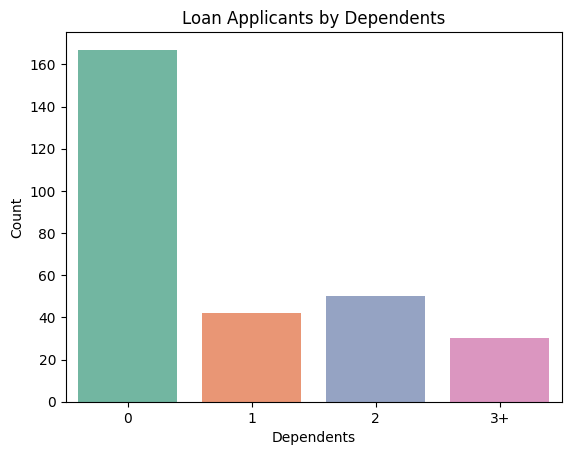

In [ ]:
sns.countplot(data=df, x="Dependents", palette="Set2")

plt.title("Loan Applicants by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

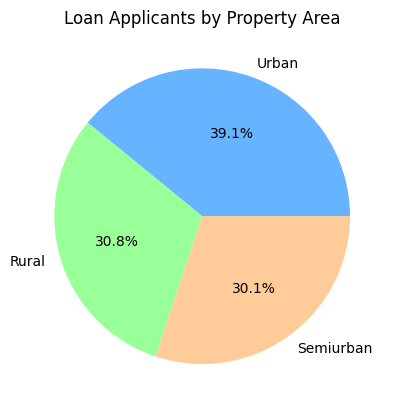

In [ ]:
property_counts = df["Property_Area"].value_counts()
plt.pie(property_counts,labels=property_counts.index, autopct='%1.1f%%',colors=["#66b3ff","#99ff99","#ffcc99"])
plt.title("Loan Applicants by Property Area")
plt.show()

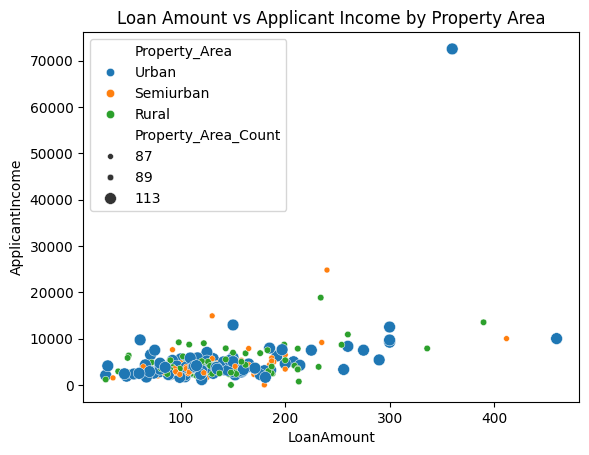

In [ ]:
property_area_count = df["Property_Area"].value_counts()
df["Property_Area_Count"] = df["Property_Area"].map(property_area_count)
sns.scatterplot(data=df, x="LoanAmount", y="ApplicantIncome",  hue="Property_Area",  size="Property_Area_Count")
plt.title("Loan Amount vs Applicant Income by Property Area")
plt.show()

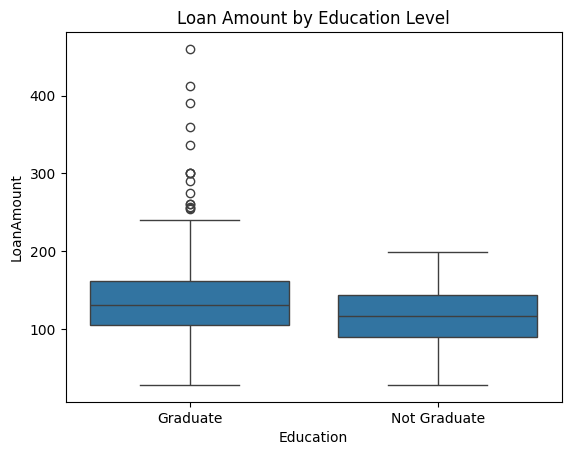

In [ ]:
sns.boxplot(data=df, x="Education", y="LoanAmount")
plt.title("Loan Amount by Education Level")
plt.show()

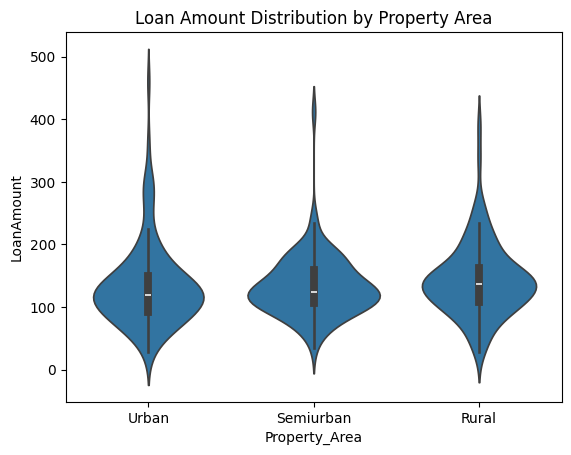

In [ ]:
sns.violinplot(data=df, x="Property_Area", y="LoanAmount")
plt.title("Loan Amount Distribution by Property Area")
plt.show()


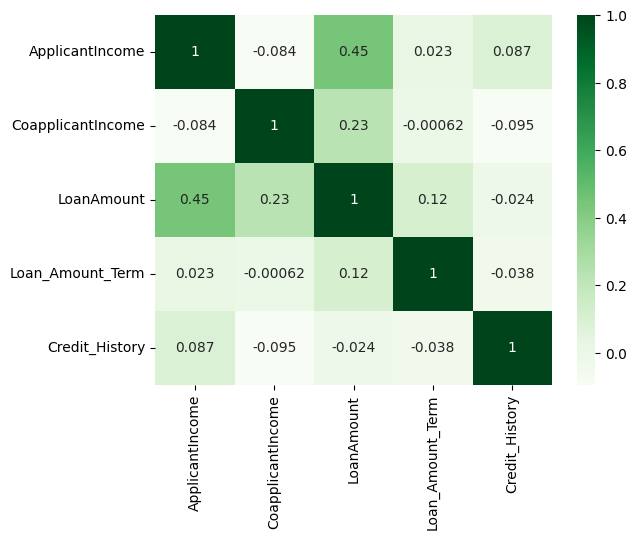

In [ ]:
sns.heatmap(df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].corr(),
            annot=True, cmap="Greens")
plt.show()


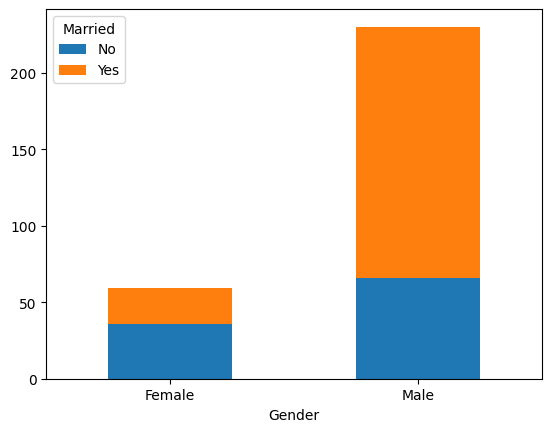

In [ ]:
pd.crosstab(df["Gender"], df["Married"]).plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.show()


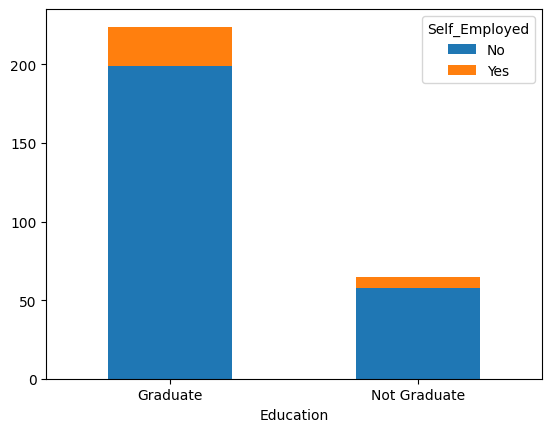

In [ ]:
pd.crosstab(df["Education"], df["Self_Employed"]).plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.show()